# CIS-522 Week 5 Part 1
# Convolutional Neural Networks : The Fundamentals

__Instructor__: Konrad Kording

__Content creators:__ Hmrishav Bandyopadhyay, Rahul Shekhar, Tejas Srivastava

__Content reviewers:__  Tejas Srivastava, Ann-Katrin Reuel

In [2]:
#@markdown What is your Pennkey and pod? (text, not numbers, e.g. bfranklin)
my_pennkey = '' #@param {type:"string"}
my_pod = "Select"  # @param ["Factorial Ferrets", "Causal Crows", "Recursive Roosters", "Bayesian Bighorns", "Probabilistic Pronghorns", "Hashing Hares", "Multiplicative Mustangs", "Curiosity Capybaras", "Subspace Salamanders"]
my_email = '' #@param {type:"string"}
tutorial = 'W6D1'

# start timing
import time
try:t0;
except NameError: t0 = time.time()

---
# Tutorial Objectives
At the end of this tutorial, we will be able to:
- be able to implement convolution as an operation
- be able to define what convolution is.
- be able to understand pooling
- be able to code a simple CNN in Pytorch

 

---
# Setup

In [2]:
#@title Dependencies
!pip install livelossplot --quiet

In [3]:
# Imports

import os
import cv2
from tqdm.auto import tqdm

import time
import torch
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
from IPython.display import HTML, display

from tqdm.notebook import tqdm, trange
from time import sleep

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device, torch.get_num_threads()

(device(type='cuda'), 1)

In [4]:
# @title Figure Settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

fig_w, fig_h = (8, 6)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

plt.rcParams["mpl_toolkits.legacy_colorbar"] = False

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")


plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/"
              "course-content/master/nma.mplstyle")

In [5]:
# @title Set seed for reproducibility
seed = 2021
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
def seed_worker(worker_id):
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)

print ('Seed has been set.')

Seed has been set.


---
# Recap the Experience from Last Week

Last week we saw how overparametrized ANNs are efficient universal approximators due to adaptive basis functions and also how ANN’s memorize some but generalize well. We also looked at several regularization techniques such as *L1*, *L2*, *Data Augmentation*, and *Dropout*. 





Video available at https://youtube.com/watch?v=xMKKVMjQNhY


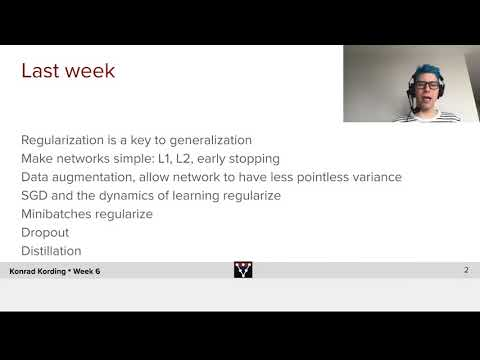

In [6]:
#@title Video: Discussing Week 5 - Regularization
import time
try: t0;
except NameError: t0=time.time()

from IPython.display import YouTubeVideo

video = YouTubeVideo(id="xMKKVMjQNhY", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

---
# Section 1: Background on CNNs 

Video available at https://youtube.com/watch?v=x-SYSSBmEX4


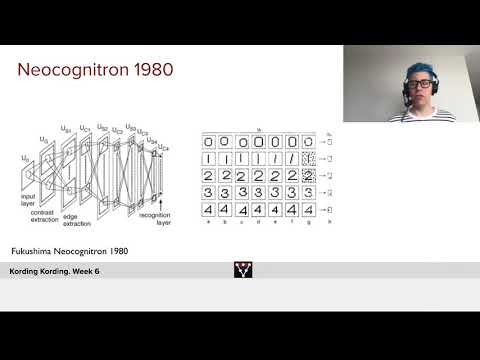

In [8]:
#@title Video: History of CNNs and Good Representations
import time
try: t1;
except NameError: t1=time.time()

from IPython.display import YouTubeVideo

video = YouTubeVideo(id="x-SYSSBmEX4", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

At a high level, a CNN attempts to generate a feature representation of an image that can be used to determine what the object is. This means that the network will try to decipher which characteristics - for a human, it could be the detection of two legs and structure of the face - are important to differentiate between objects. 

In [9]:
#@title Quiz Question 1
#@markdown ImageNet is one of the largest image databases. Let us take 4 categories within this dataset - animal, plant, activity, and food. What features do you think you would use to classify an image into one of these categories?
imagenet_features = '' #@param {type:"string"}

---
# Section 2: Neural Analogy

Video available at https://youtube.com/watch?v=cndkwecg52M


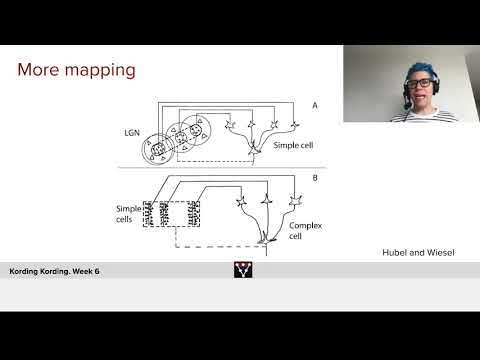

In [10]:
#@title Video: Electrophysiology Introduction
import time
try: t2;
except NameError: t2=time.time()

from IPython.display import YouTubeVideo

video = YouTubeVideo(id="cndkwecg52M", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

---
# Section 3: Spatial Invariance
Imagine that you want to detect an object in an image. It seems reasonable that whatever method we use to recognize objects should not be overly concerned with the precise location of the object in the image. Ideally, our system should exploit this knowledge. Pigs usually do not fly and planes usually do not swim. Nonetheless, we should still recognize a pig was the one to appear at the top of the image. This is what we refer to as *spatial invariance* i.e the position of the object in the image does not play a role in recognizing the object itself.


In [11]:
#@title ## Quiz Question 2
#@markdown Do you think that fully connected networks that you have been using till now accomplish this task? Why/Why not?
fcn_invariance = '' #@param {type:"string"}

---
#Section 4: Convolutions

Video available at https://youtube.com/watch?v=5cbf6wRjvJc


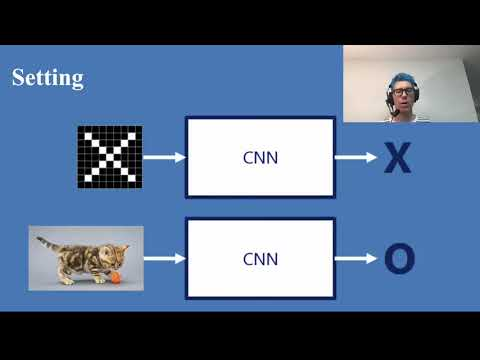

In [12]:
#@title Video: How to Perform Convolutions?
import time
try: t3;
except NameError: t3=time.time()

from IPython.display import YouTubeVideo

video = YouTubeVideo(id="5cbf6wRjvJc", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

## Exercise 4.1: Code a convolution.
Here we have given a function that performs a convolution on a provided image. Fill in the missing lines of code.

In [13]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    # Note: We are dealing with a square kernel here, only for simplicity.
    # It is very much possible to perform the same on kernels with different heights and widths!
    if (m == n):
        y, x = image.shape
        ####################################################################
        # Fill in missing code below (...),
        # then remove or comment the line below to test your function
        raise NotImplementedError("perform the convolution")
        ####################################################################
        # Hint: x_op and y_op will be the output dimensions, initialize them
        y_op = ... 
        x_op = ...
        convolved_image = np.zeros((y_op, x_op))
        # Hint: Now perform the actual convolution
        for i in range(y_op):
            for j in range(x_op):
                ####################################################################
                # Fill in missing code below (...),
                # then remove or comment the line below to test your function
                raise NotImplementedError("perform the convolution")
                ####################################################################
                convolved_image[i][j] = ...
    
    return convolved_image

### Uncomment below to test your function
# image = np.arange(9).reshape(3, 3)
# print("Image:\n",image)
# kernel = np.arange(4).reshape(2, 2)
# print("Kernel:\n",kernel)
# print("Convolved output:\n",convolution2d(image, kernel))

Great! At this point, you should have a fair idea of how to perform a convolution on an image given a kernel. In the following cell, we will show you how you can set up a CNN to perform the exact same convolution as above.

In [15]:
class Net(nn.Module):
  def __init__(self, kernel=None, padding=0):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=padding)
      
    # set up kernel 
    if kernel is not None:
      dim1, dim2 = kernel.shape[0], kernel.shape[1]
      kernel = kernel.reshape(1, 1, dim1, dim2)
  
      self.conv1.weight = torch.nn.Parameter(kernel)
      self.conv1.bias = torch.nn.Parameter(torch.zeros_like(self.conv1.bias))
            
  def forward(self, x):
    x = self.conv1(x)
    return x


In [16]:
kernel = torch.Tensor(np.arange(4).reshape(2, 2))
net = Net(kernel=kernel, padding=0).to(device)

# set up image 
image = torch.Tensor(np.arange(9).reshape(3, 3))
image = image.reshape(1, 1, 3, 3).to(device) # BatchSize X Channels X Height X Width

output = net(image)
output

tensor([[[[19., 25.],
          [37., 43.]]]], device='cuda:0', grad_fn=<AddBackward0>)

As a quick aside, notice the difference in the input and output size. The input had a size of $3 \times 3$ and the output is of size $2 \times 2$. This is because the edges get missed out as then the kernel would be out of bounds of the image. If we don't want to lose that information, we will have to pad the image with $0$s on the edges. This process is called padding.

In [17]:
net = Net(kernel=kernel, padding=1).to(device)
output = net(image)
output

tensor([[[[ 0.,  3.,  8.,  4.],
          [ 9., 19., 25., 10.],
          [21., 37., 43., 16.],
          [ 6.,  7.,  8.,  0.]]]], device='cuda:0', grad_fn=<AddBackward0>)

---
# Section 5: Edge Detection



Video available at https://youtube.com/watch?v=mNbYB0C8OO0


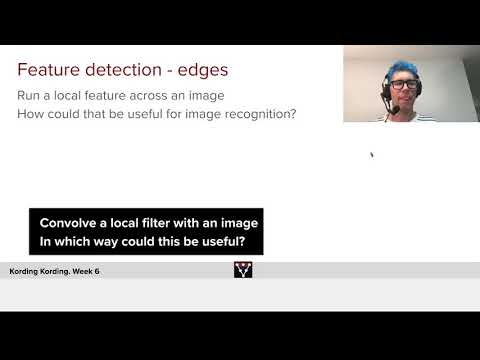

In [18]:
#@title Video: Padding and Edge Detection 
import time
try: t4;
except NameError: t4=time.time()

from IPython.display import YouTubeVideo

video = YouTubeVideo(id="mNbYB0C8OO0", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

One of the simpler tasks performed by a convolution layer is edge detection by detecting the change in the value of pixels. This is usually learned by the first couple of layers in the network. Look at the following very simple kernel and discuss whether this will detect vertical or horizontal edges.


$$ \textbf{Kernel} = 
\begin{bmatrix} 1 & -1 \\ 1 & -1
\end{bmatrix} 
$$

In [19]:
#@title ## Quiz Question 3
#@markdown What kind of edges do you think this will generate? (open-ended question, no right or wrong answer)
edge_generate = '' #@param {type:"string"}

Here, we start with an image that has three vertical regions with the darker shade in the middle and the lighter shade in the surrounding regions. It can also be thought of as a very zoomed-in vertical edge within an image!

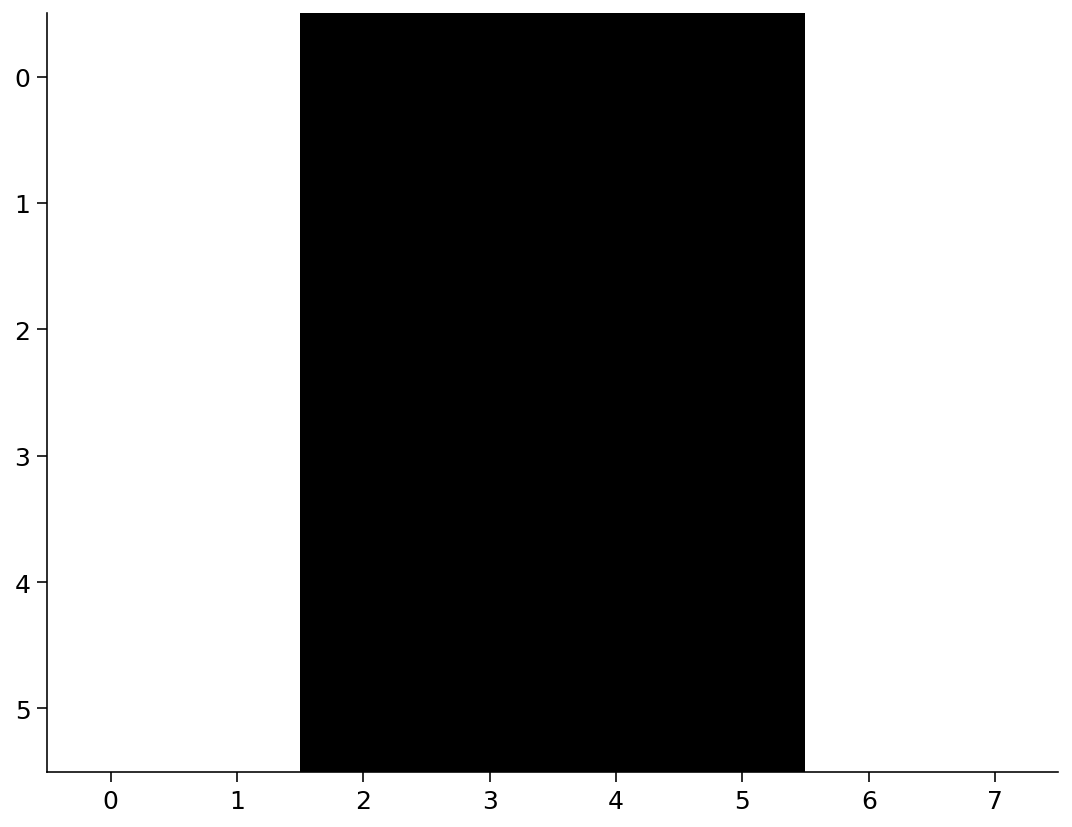

In [20]:
X = np.ones((6, 8))
X[:, 2:6] = 0
plt.imshow(X, cmap=plt.get_cmap('gray'))
plt.show()

In [21]:
image = torch.from_numpy(X)
image = image.reshape(1, 1, 6, 8) # BatchSize X Channels X Height X Width
kernel = torch.Tensor([[1.0, -1.0],[1.0, -1.0]])
net = Net(kernel=kernel)
edges = net(image.float())

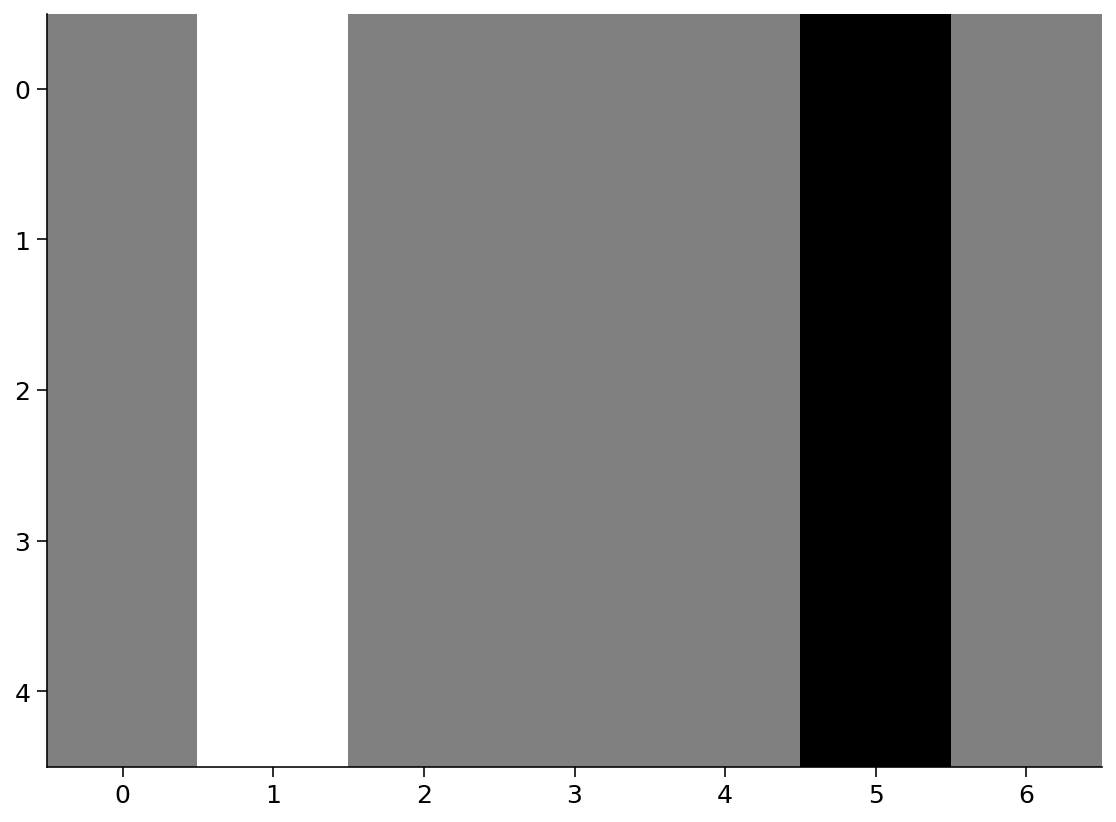

In [22]:
plt.imshow(edges.reshape(5, 7).detach().numpy(), cmap=plt.get_cmap('gray'))
plt.show()

The convolved output basically highlights both the vertical transitions in going from a lighter shade to darker and from darker to lighter. Thus, helping us detect the vertical edges in the input image.  

In [23]:
#@title ## Quiz Question 4
#@markdown As you can see, this kernel detects vertical edges. If the kernel was transposed, what would would be produced by running this kernel?
transpose_kernel = '' #@param {type:"string"}

We will come back to strides in the MaxPool section.

---
# Section 6: Visualizing the Primary Components of a CNN

To visualize the various components of a CNN, we will build a simple CNN step by step. Remember how we've already used the MNIST dataset that consisted of binary images of handwritten digits. This time we will be using the EMNIST letters dataset, which consists of handwritten characters ($A \rightarrow Z$).

We will simplify the problem further by only keeping the images that correspond to $X$ (labeled as 24 in the dataset) and $O$ (labeled as 15 in the dataset) and building a CNN that can classify an image either $X$ or $O$.

In [24]:
#@title Dataset/DataLoader Functions
#@markdown Run this cell

# loading the dataset 
def get_Xvs0_dataset():

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    emnist_train = datasets.EMNIST(root='./data', split='letters', download=True, train=True, transform=transform)
    emnist_test = datasets.EMNIST(root='./data', split='letters', download=True, train=False, transform=transform)

    # only want O (15) and X (24) labels 
    train_idx = (emnist_train.targets == 15) | (emnist_train.targets == 24)
    emnist_train.targets = emnist_train.targets[train_idx]
    emnist_train.data = emnist_train.data[train_idx]  

    # convert Xs predictions to 1, Os predictions to 0
    emnist_train.targets = (emnist_train.targets == 24).type(torch.int64)

    test_idx = (emnist_test.targets == 15) | (emnist_test.targets == 24)
    emnist_test.targets = emnist_test.targets[test_idx]
    emnist_test.data = emnist_test.data[test_idx]

    # convert Xs predictions to 1, Os predictions to 0
    emnist_test.targets = (emnist_test.targets == 24).type(torch.int64)

    return emnist_train, emnist_test

def get_data_loaders(train_dataset, test_dataset, batch_size=32):
    train_loader = DataLoader(train_dataset, batch_size=batch_size,
                         shuffle=True, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=batch_size,
                         shuffle=True, num_workers=0)
    
    return train_loader, test_loader


In [25]:
emnist_train, emnist_test = get_Xvs0_dataset()
train_loader, test_loader = get_data_loaders(emnist_train, emnist_test)

# index of an image in the dataset that corresponds to an X and O
x_img_idx = 11
o_img_idx = 0

  0%|          | 0/561753746 [00:00<?, ?it/s]

Extracting ./data/EMNIST/raw/gzip.zip to ./data/EMNIST/raw


Let's view a couple samples from the dataset.

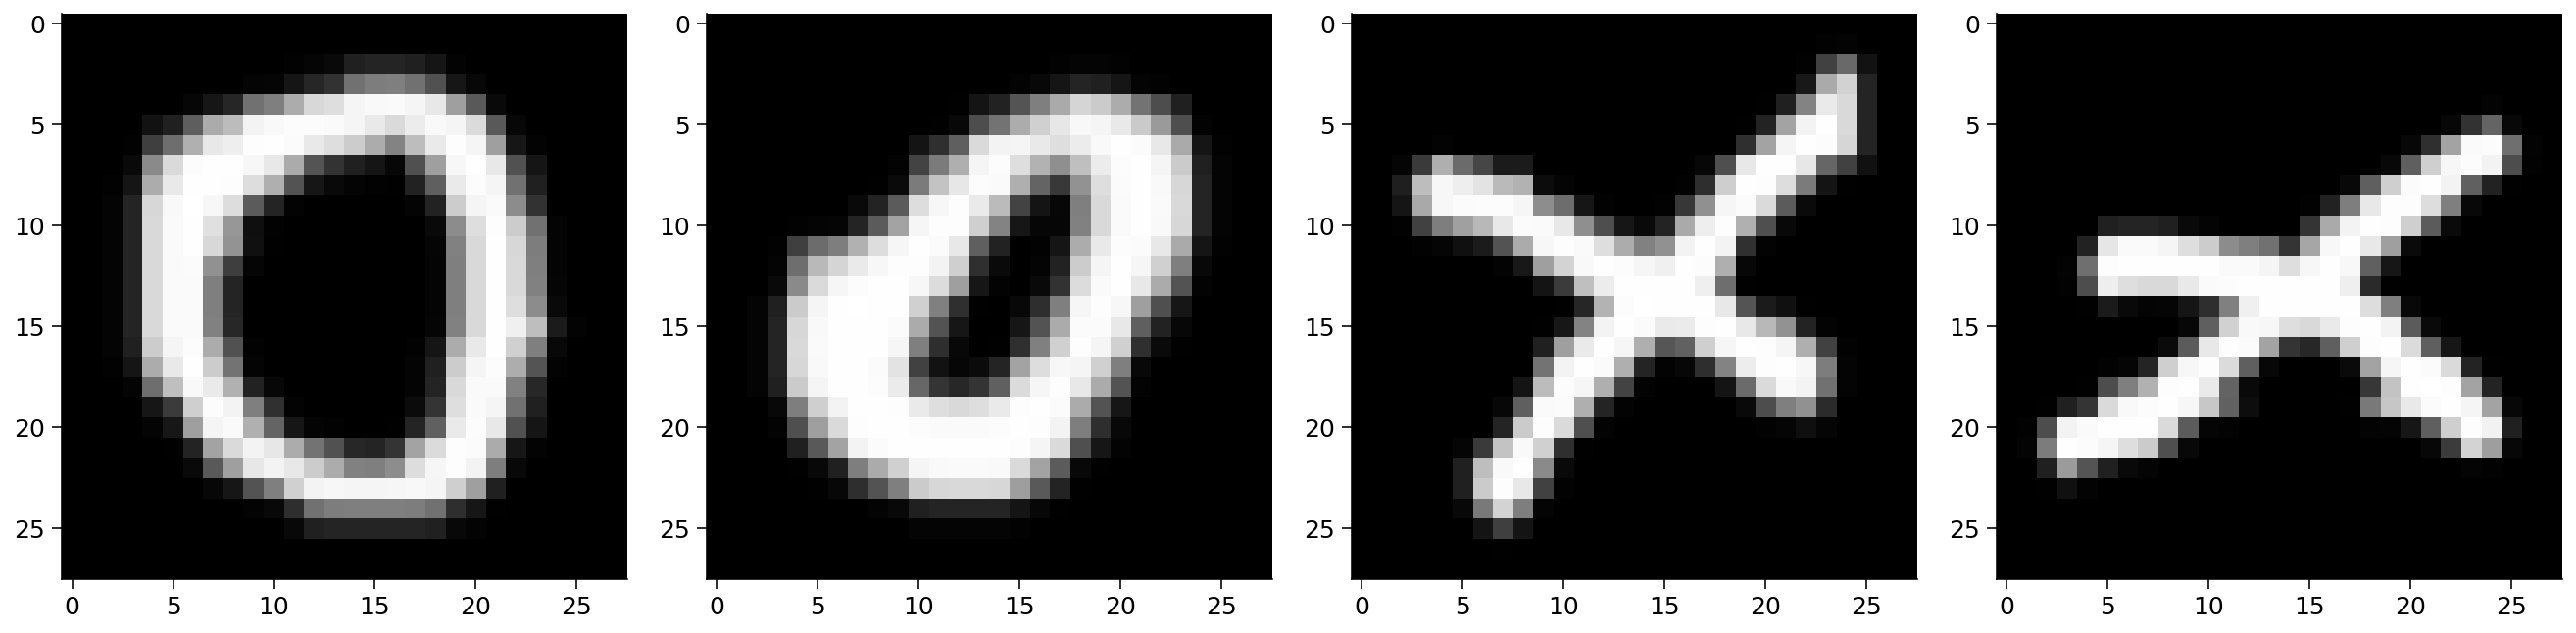

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.imshow(emnist_train[0][0].reshape(28, 28), cmap=plt.get_cmap('gray'))
ax2.imshow(emnist_train[10][0].reshape(28, 28), cmap=plt.get_cmap('gray'))
ax3.imshow(emnist_train[4][0].reshape(28, 28), cmap=plt.get_cmap('gray'))
ax4.imshow(emnist_train[6][0].reshape(28, 28), cmap=plt.get_cmap('gray'))
fig.set_size_inches(18.5, 10.5)
plt.show()

Great! Now, it's time to watch a video explaining the different components of a CNN.

Video available at https://youtube.com/watch?v=kMCZKMbT5rk


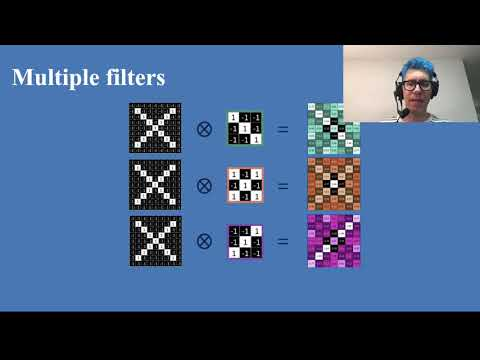

In [27]:
#@title Video: Multiple Filters, ReLU and Max Pool
import time
try: t5;
except NameError: t5=time.time()

from IPython.display import YouTubeVideo

video = YouTubeVideo(id="kMCZKMbT5rk", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

## Section 6.1 Multiple Filters

The following network sets up 3 filters and runs them on an $X$ image of the dataset.

In [28]:
class Net2(nn.Module):
  def __init__(self, kernel=None, padding=0):
    super(Net2, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3,
                           padding=padding)

    # first kernel - leading diagonal
    kernel_1 = torch.unsqueeze(torch.Tensor([[1, -1, -1],
                                             [-1, 1, -1],
                                             [-1, -1, 1]]), 0)

    # second kernel -checkerboard pattern
    kernel_2 = torch.unsqueeze(torch.Tensor([[1, -1, 1],
                                             [-1, 1, -1],
                                             [1, -1, 1]]), 0)

    # third kernel - other diagonal
    kernel_3 = torch.unsqueeze(torch.Tensor([[-1, -1, 1],
                                             [-1, 1, -1],
                                             [1, -1, -1]]), 0)

    multiple_kernels = torch.stack([kernel_1, kernel_2, kernel_3], dim=0)

    self.conv1.weight = torch.nn.Parameter(multiple_kernels)
    self.conv1.bias = torch.nn.Parameter(torch.zeros_like(self.conv1.bias))

  def forward(self, x):
    x = self.conv1(x)
    return x

In [29]:
net2 = Net2().to(device)

In [30]:
x_img = emnist_train[x_img_idx][0].unsqueeze(dim=0).to(device)
output_x = net2(x_img)
output_x = output_x.squeeze(dim=0).detach().cpu().numpy()

o_img = emnist_train[o_img_idx][0].unsqueeze(dim=0).to(device)
output_o = net2(o_img)
output_o = output_o.squeeze(dim=0).detach().cpu().numpy()

Let us view the image of $X$ and $O$ that we want to run the filters on.

ORIGINAL IMAGES


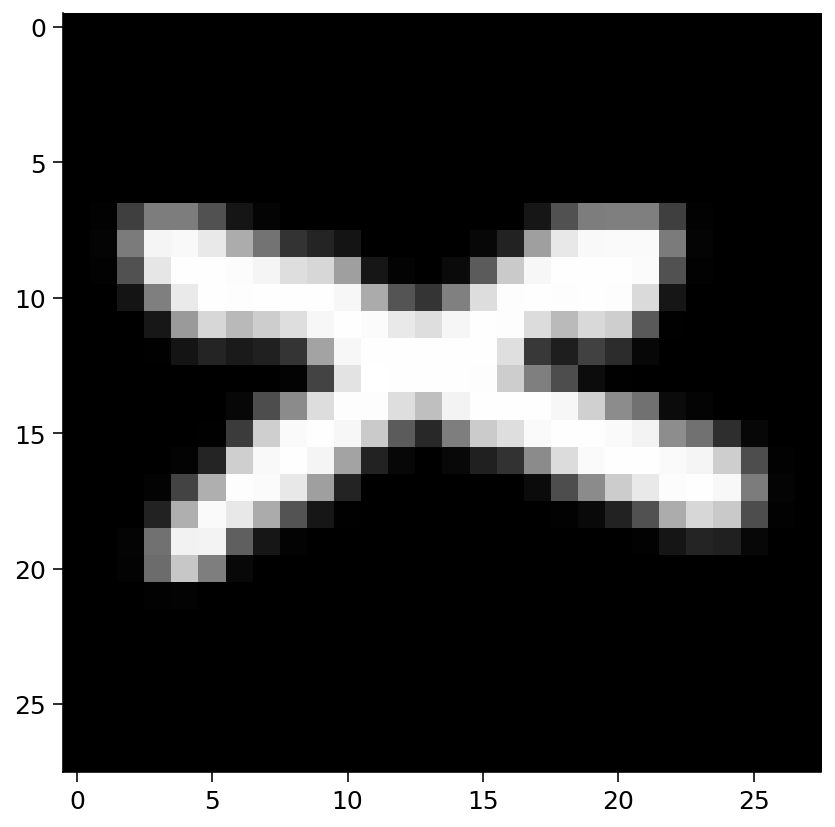

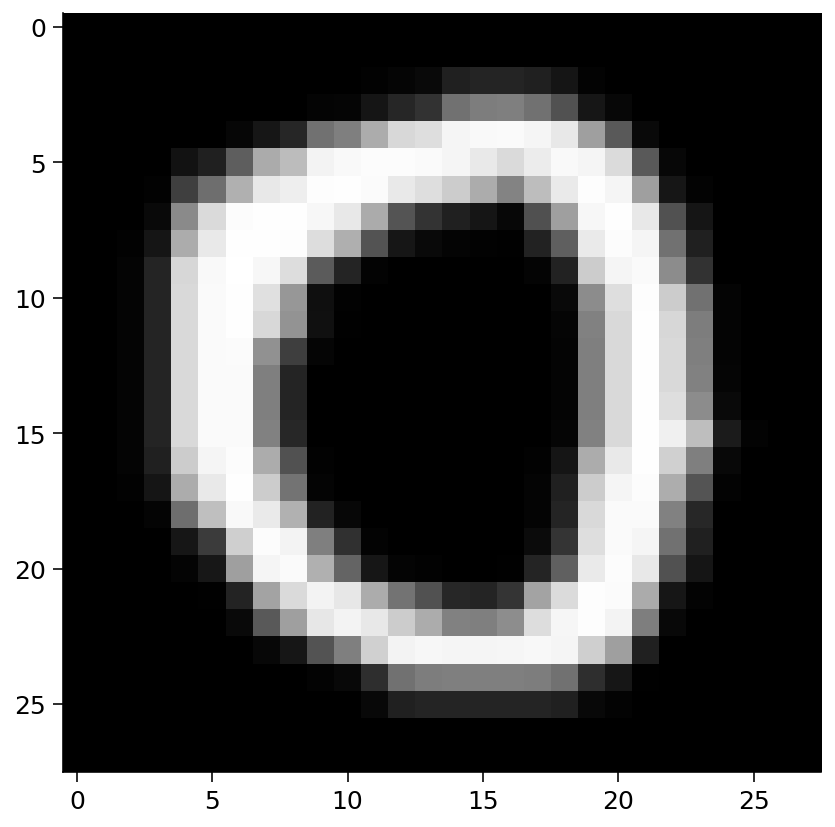

In [31]:
print("ORIGINAL IMAGES")
plt.imshow(emnist_train[x_img_idx][0].reshape(28, 28),
           cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(emnist_train[o_img_idx][0].reshape(28, 28),
           cmap=plt.get_cmap('gray'))
plt.show()

CONVOLVED IMAGES


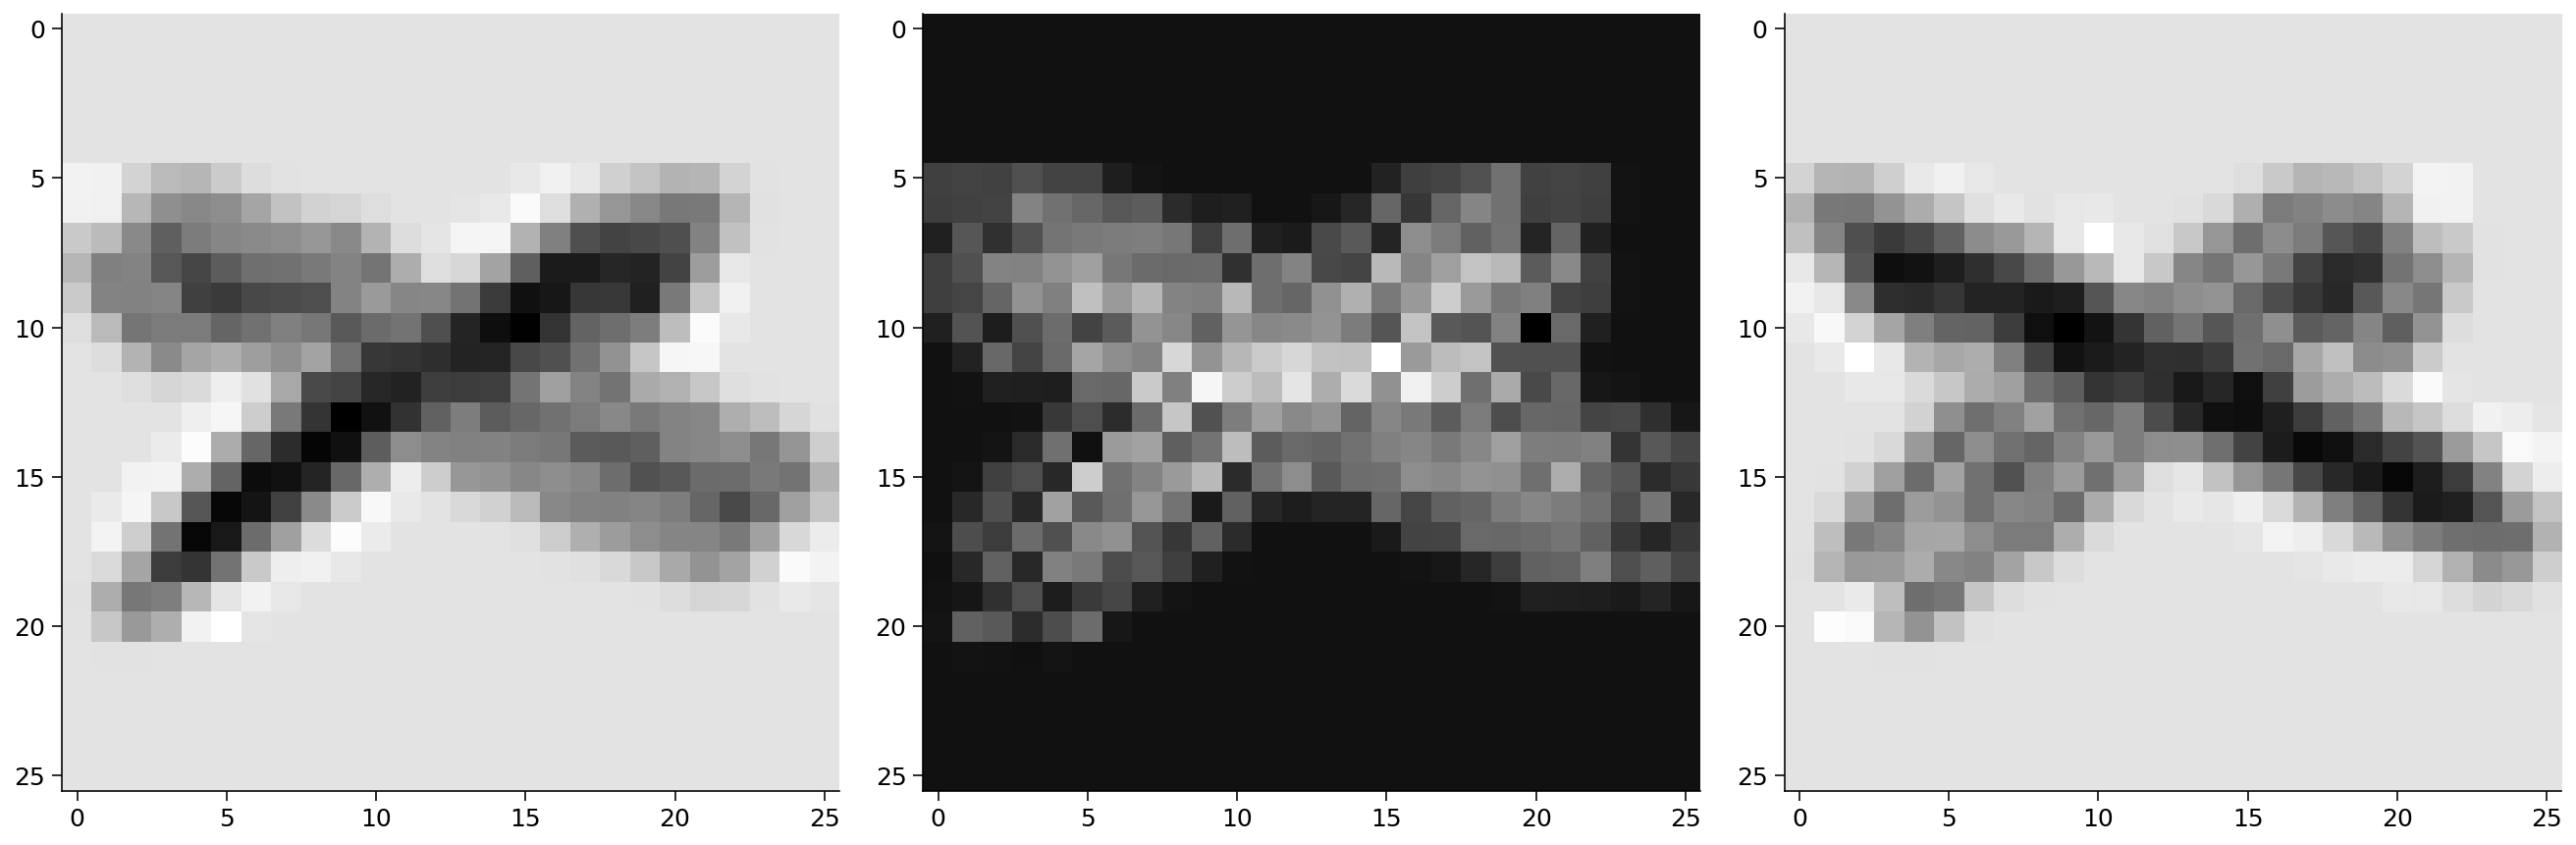

In [32]:
print("CONVOLVED IMAGES")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(output_x[0], cmap=plt.get_cmap('gray'))
ax2.imshow(output_x[1], cmap=plt.get_cmap('gray'))
ax3.imshow(output_x[2], cmap=plt.get_cmap('gray'))
fig.set_size_inches(18.5, 10.5)
plt.show()

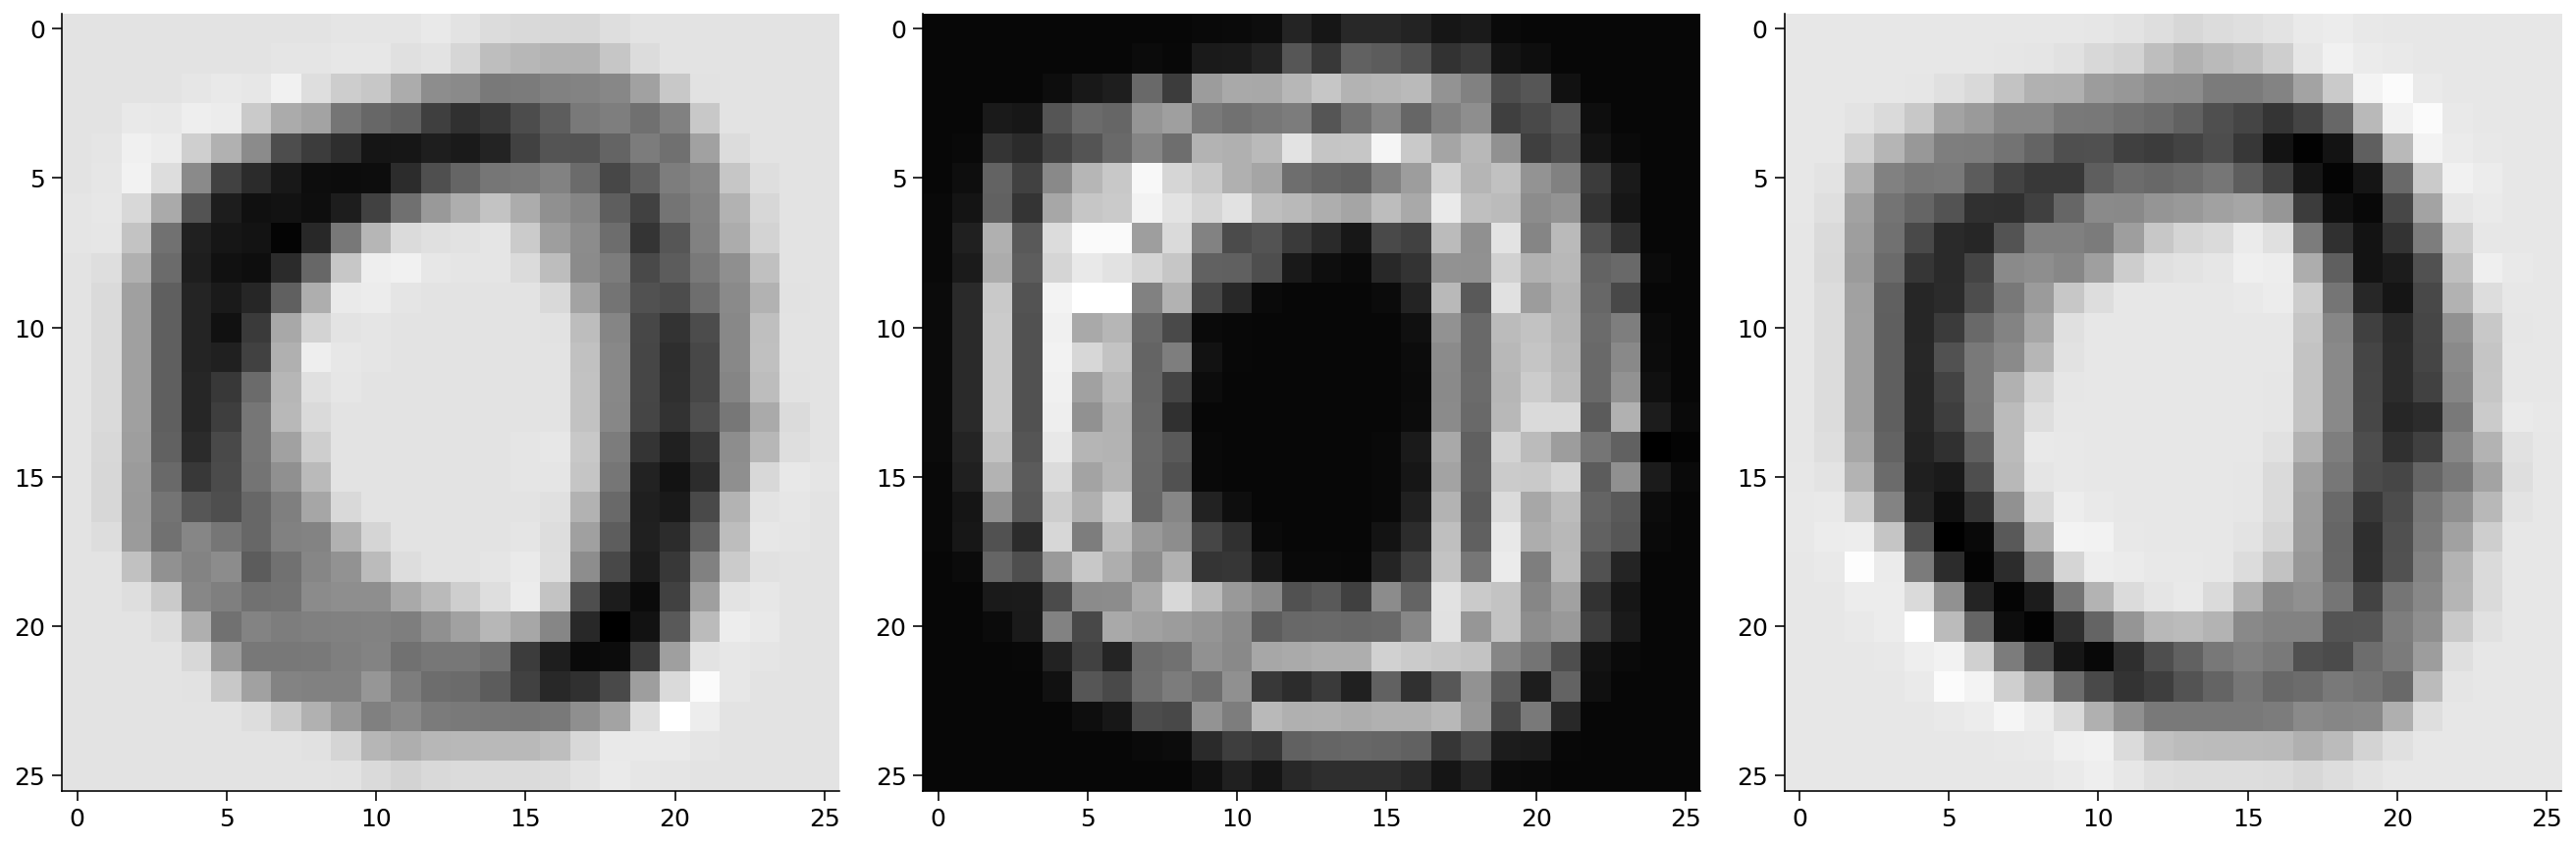

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(output_o[0], cmap=plt.get_cmap('gray'))
ax2.imshow(output_o[1], cmap=plt.get_cmap('gray'))
ax3.imshow(output_o[2], cmap=plt.get_cmap('gray'))
fig.set_size_inches(18.5, 10.5)
plt.show()

In [34]:
#@title ## Quiz Question 5
#@markdown How would these filters help to recognize an X?
multiple_filters = '' #@param {type:"string"}

## Section 6.2 ReLU after convolutions

Note that the convolutional operation is still linear in nature. However, the inputs to our CNNs, which we want to identify and learn correctly, are naturally non-linear and complex. The purpose of applying the rectifier function is to increase the non-linearity in our model, which wants to learn complex features typically from an image.

When you look at any image, you'll find it contains many non-linear features (e.g., the transition between pixels, the borders, the colors, etc.).

The rectifier serves to break up the linearity even further to make up for the linearity that we might impose an image when we put it through the convolution operation. To see how that actually plays out, we can look at the following picture and see the changes that happen to it; it undergoes the convolution operation followed by rectification.


Now let us apply ReLU to our previous model and visualize it.

In [35]:
class Net3(nn.Module):
  def __init__(self, kernel=None, padding=0):
    super(Net3, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3,
                           padding=padding)
    
    # first kernel - leading diagonal
    kernel_1 = torch.unsqueeze(torch.Tensor([[1, -1, -1],
                                             [-1, 1, -1],
                                             [-1, -1, 1]]), 0)

    # second kernel - checkerboard pattern
    kernel_2 = torch.unsqueeze(torch.Tensor([[1, -1, 1],
                                             [-1, 1, -1],
                                             [1, -1, 1]]), 0)

    # third kernel - other diagonal
    kernel_3 = torch.unsqueeze(torch.Tensor([[-1, -1, 1],
                                             [-1, 1, -1],
                                             [1, -1, -1]]), 0)

    multiple_kernels = torch.stack([kernel_1, kernel_2, kernel_3], dim=0)

    self.conv1.weight = torch.nn.Parameter(multiple_kernels)
    self.conv1.bias = torch.nn.Parameter(torch.zeros_like(self.conv1.bias))

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    return x

In [36]:
net3 = Net3().to(device)
x_img = emnist_train[x_img_idx][0].unsqueeze(dim=0).to(device)
output_x = net3(x_img)
output_x = output_x.squeeze(dim=0).detach().cpu().numpy()

o_img = emnist_train[o_img_idx][0].unsqueeze(dim=0).to(device)
output_o = net3(o_img)
output_o = output_o.squeeze(dim=0).detach().cpu().numpy()

RECTIFIED OUTPUTS


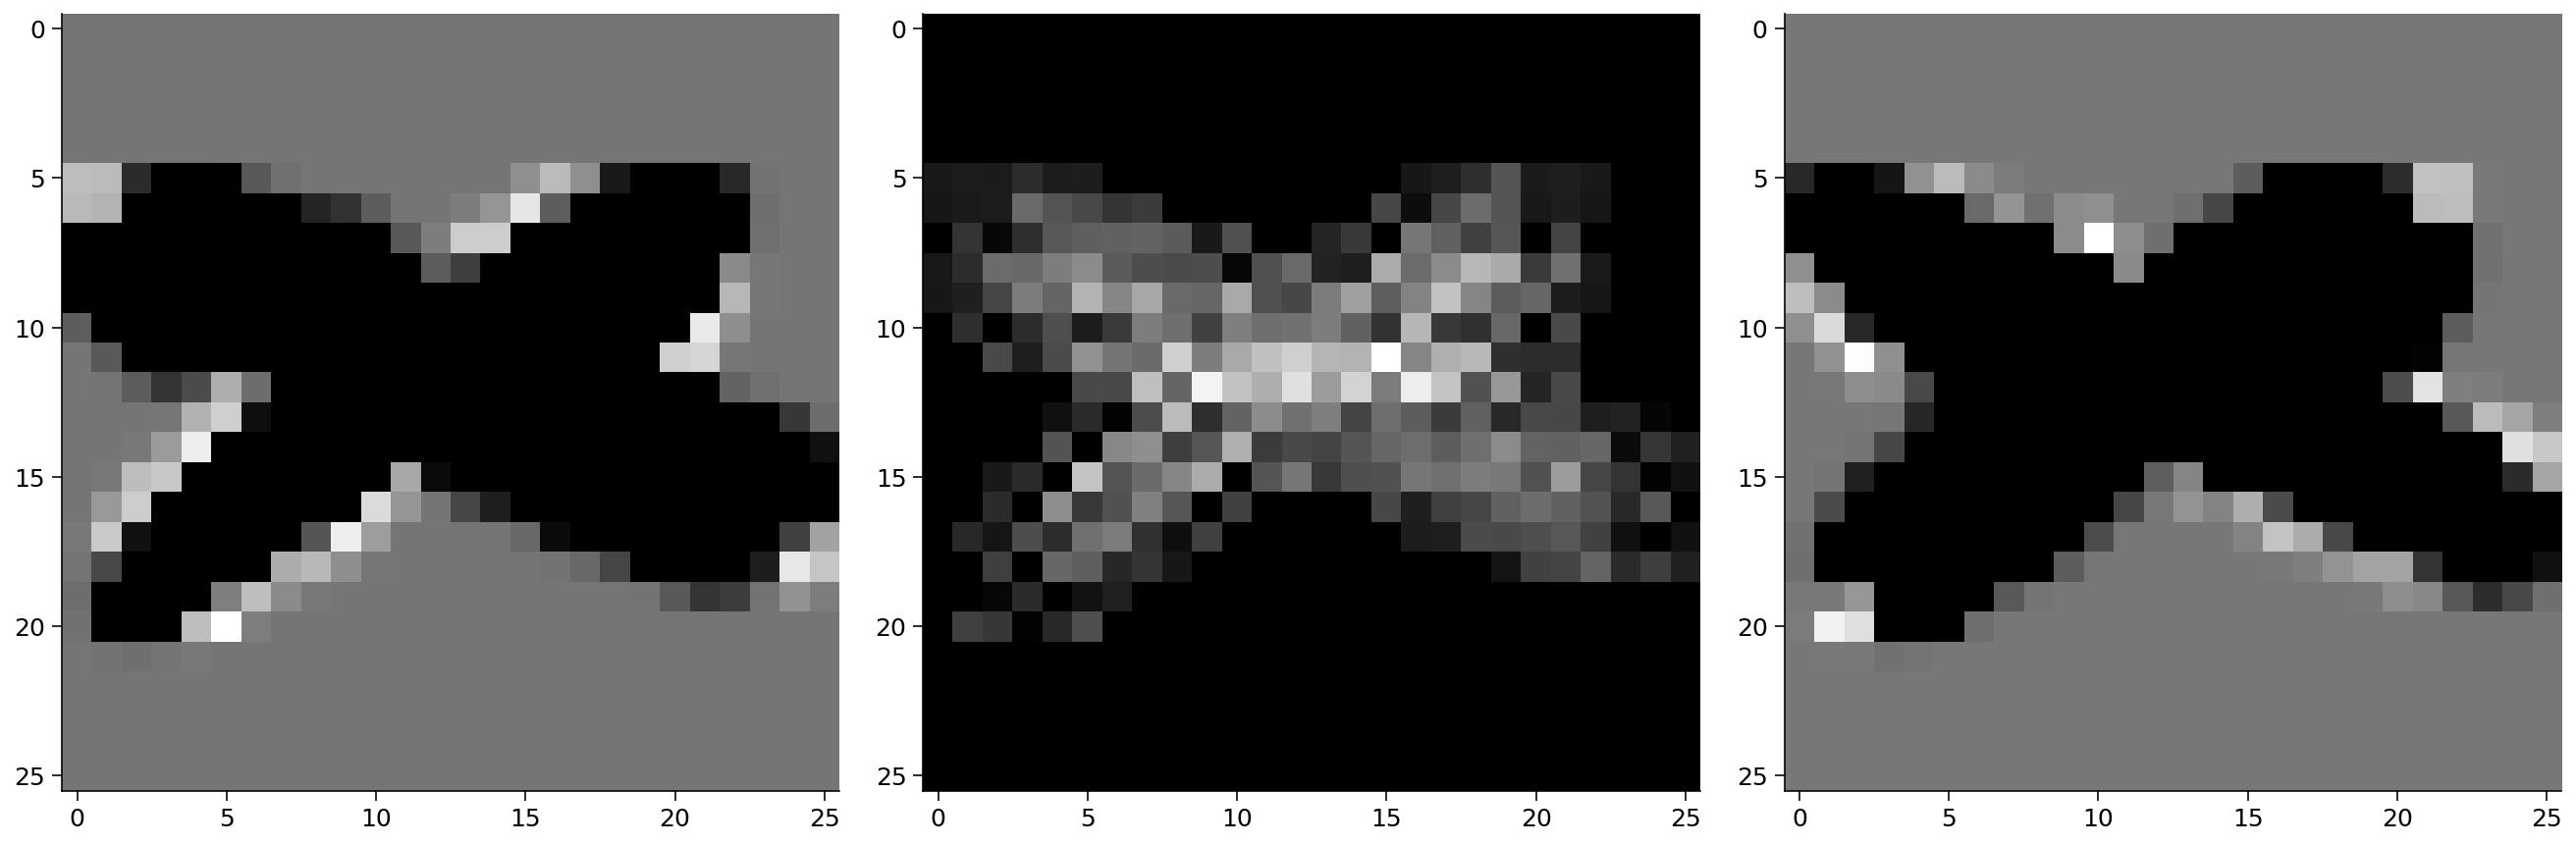

In [37]:
print("RECTIFIED OUTPUTS")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(output_x[0], cmap=plt.get_cmap('gray'))
ax2.imshow(output_x[1], cmap=plt.get_cmap('gray'))
ax3.imshow(output_x[2], cmap=plt.get_cmap('gray'))
fig.set_size_inches(18.5, 10.5)
plt.show()

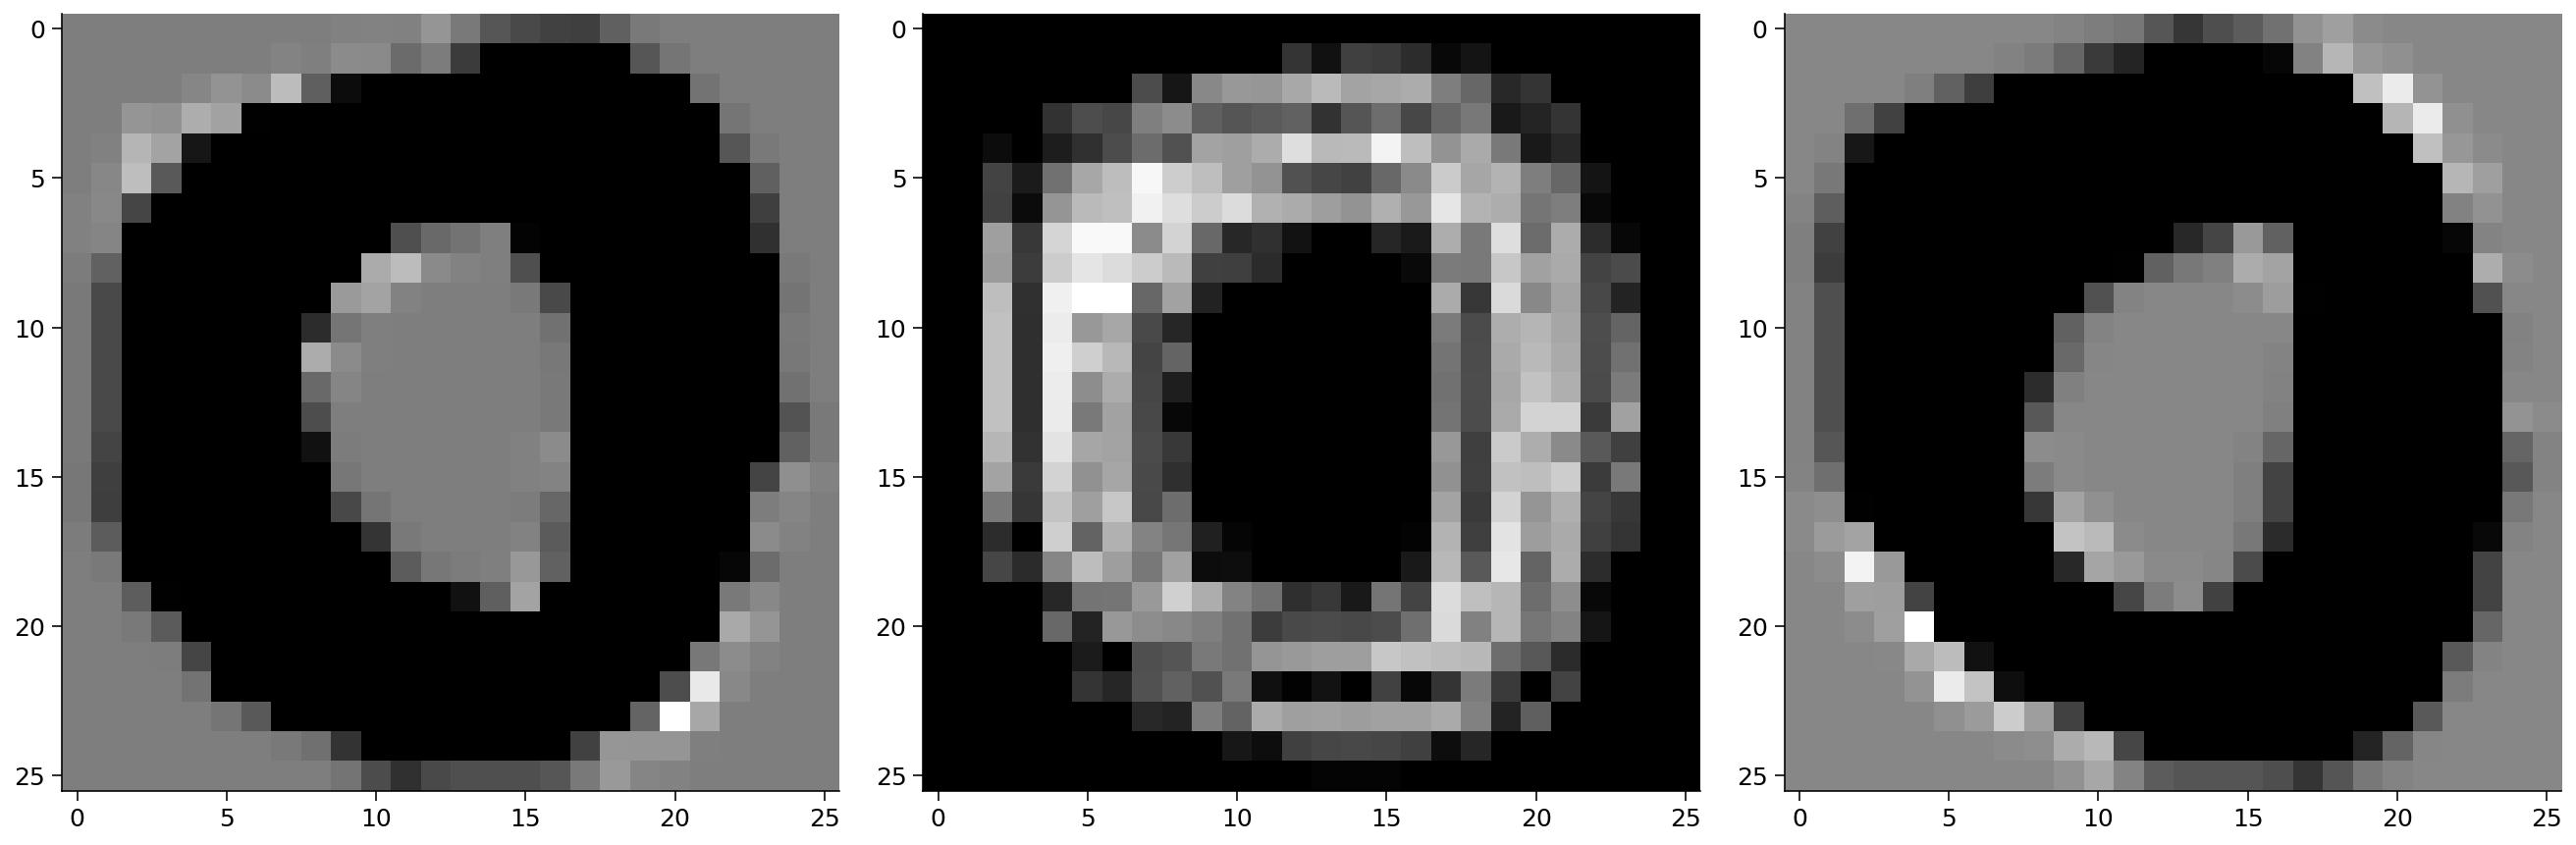

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(output_o[0], cmap=plt.get_cmap('gray'))
ax2.imshow(output_o[1], cmap=plt.get_cmap('gray'))
ax3.imshow(output_o[2], cmap=plt.get_cmap('gray'))
fig.set_size_inches(18.5, 10.5)
plt.show()

## Section 6.3: Pooling

Convolutional layers in a convolutional neural network systematically apply learned filters to input images to create feature maps that summarize the presence of those features in the input. However, a limitation of the feature map output of convolutional layers is that they record the precise position of features in the input. This means that small movements in the position of the feature in the input image will result in a different feature map. This can happen with re-cropping, rotation, shifting, and other minor changes to the input image.

A common approach to addressing this problem from signal processing is called downsampling. This is where a lower resolution version of an input signal is created that still contains the large or important structural elements without the fine detail that may not be as useful to the task. This also translates to the problem of having too many features in the output of the convolutional layers, and techniques such as Max Pooling and average Pooling are used to downsample, thereby shrinking the layers, the number of features, and bringing spatial invariance of features.

Like convolutional layers, pooling operators consist of a fixed-shape window slid over all regions in the input according to its stride, computing a single output for each location traversed by the fixed-shape window (sometimes known as the pooling window). 

Thus, it is a method of information compression where we replace the output of a convolutional neural network at the pixel level with its neighbors' summary statistics.
- In Maxpooling, we replace each pixel with the maximum value in its immediate neighbors fitting inside the pooling kernel.
- In Avgpooling, we replace each pixel with the average value in its immediate neighbors fitting inside the pooling kernel.

<figure>
    <center><img src=https://developers.google.com/machine-learning/glossary/images/PoolingConvolution.svg?hl=fr width=400px>
    <figcaption>An Example of Pooling with a kernel size of 2</figcaption>
    </center>
</figure>

Pooling helps us maintain translational invariance in our network as it selects the statistical summary of the values residing in the kernel space. Thus, a small displacement of the value contributing primarily to that summary does not make a huge difference.

Note that the pooling layer contains no parameters (there is no kernel), unlike the convolutional layer. 


We usually use MaxPool with a stride of two to lower the dimensionality. This is essentially how we downsample. The following two pictures depict how stride makes a difference.




<figure>
    <center><img src=https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif>
    <figcaption> Stride 1 </figcaption>
    </center>    
</figure>


<figure>
    <center><img src=https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_strides.gif>
    <figcaption> Stride Two </figcaption>
    </center>    
</figure>


## Exercise 6.2: Implement MaxPooling 

Let us now implement MaxPooling in PyTorch and observe the effects of Pooling on the dimension of the input image. Use a kernel of size 2 and stride of 2.

In [39]:
class Net4(nn.Module):
  def __init__(self, kernel=None, padding=0, stride=2):
    super(Net4, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3,
                           padding=padding)
  
    # first kernel 
    kernel_1 = torch.unsqueeze(torch.Tensor([[1, -1, -1],
                                             [-1, 1, -1],
                                             [-1, -1, 1]]), 0)

    # second kernel 
    kernel_2 = torch.unsqueeze(torch.Tensor([[1, -1, 1],
                                             [-1, 1, -1],
                                             [1, -1, 1]]), 0)

    # third kernel 
    kernel_3 = torch.unsqueeze(torch.Tensor([[-1, -1, 1],
                                             [-1, 1, -1],
                                             [1, -1, -1]]), 0)

    multiple_kernels = torch.stack([kernel_1, kernel_2, kernel_3], dim=0)

    self.conv1.weight = torch.nn.Parameter(multiple_kernels)
    self.conv1.bias = torch.nn.Parameter(torch.zeros_like(self.conv1.bias))

    ####################################################################
    # Fill in missing code below (...),
    # then remove or comment the line below to test your function
    raise NotImplementedError("Define the maxpool layer")
    ####################################################################
    # Hint: Use nn.MaxPool2d
    self.pool = ...
            
  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    ####################################################################
    # Fill in missing code below (...),
    # then remove or comment the line below to test your function
    raise NotImplementedError("Define the maxpool layer")
    ####################################################################
    x = ...
    return x


### Uncomment the lines below to run the network and then run the next cell
### to plot the images  
# net4 = Net4().to(device)
# x_img = emnist_train[x_img_idx][0].unsqueeze(dim=0).to(device)
# output_x = net4(x_img)
# output_x = output_x.squeeze(dim=0).detach().cpu().numpy()
# o_img = emnist_train[o_img_idx][0].unsqueeze(dim=0).to(device)
# output_o = net4(o_img)
# output_o = output_o.squeeze(dim=0).detach().cpu().numpy()

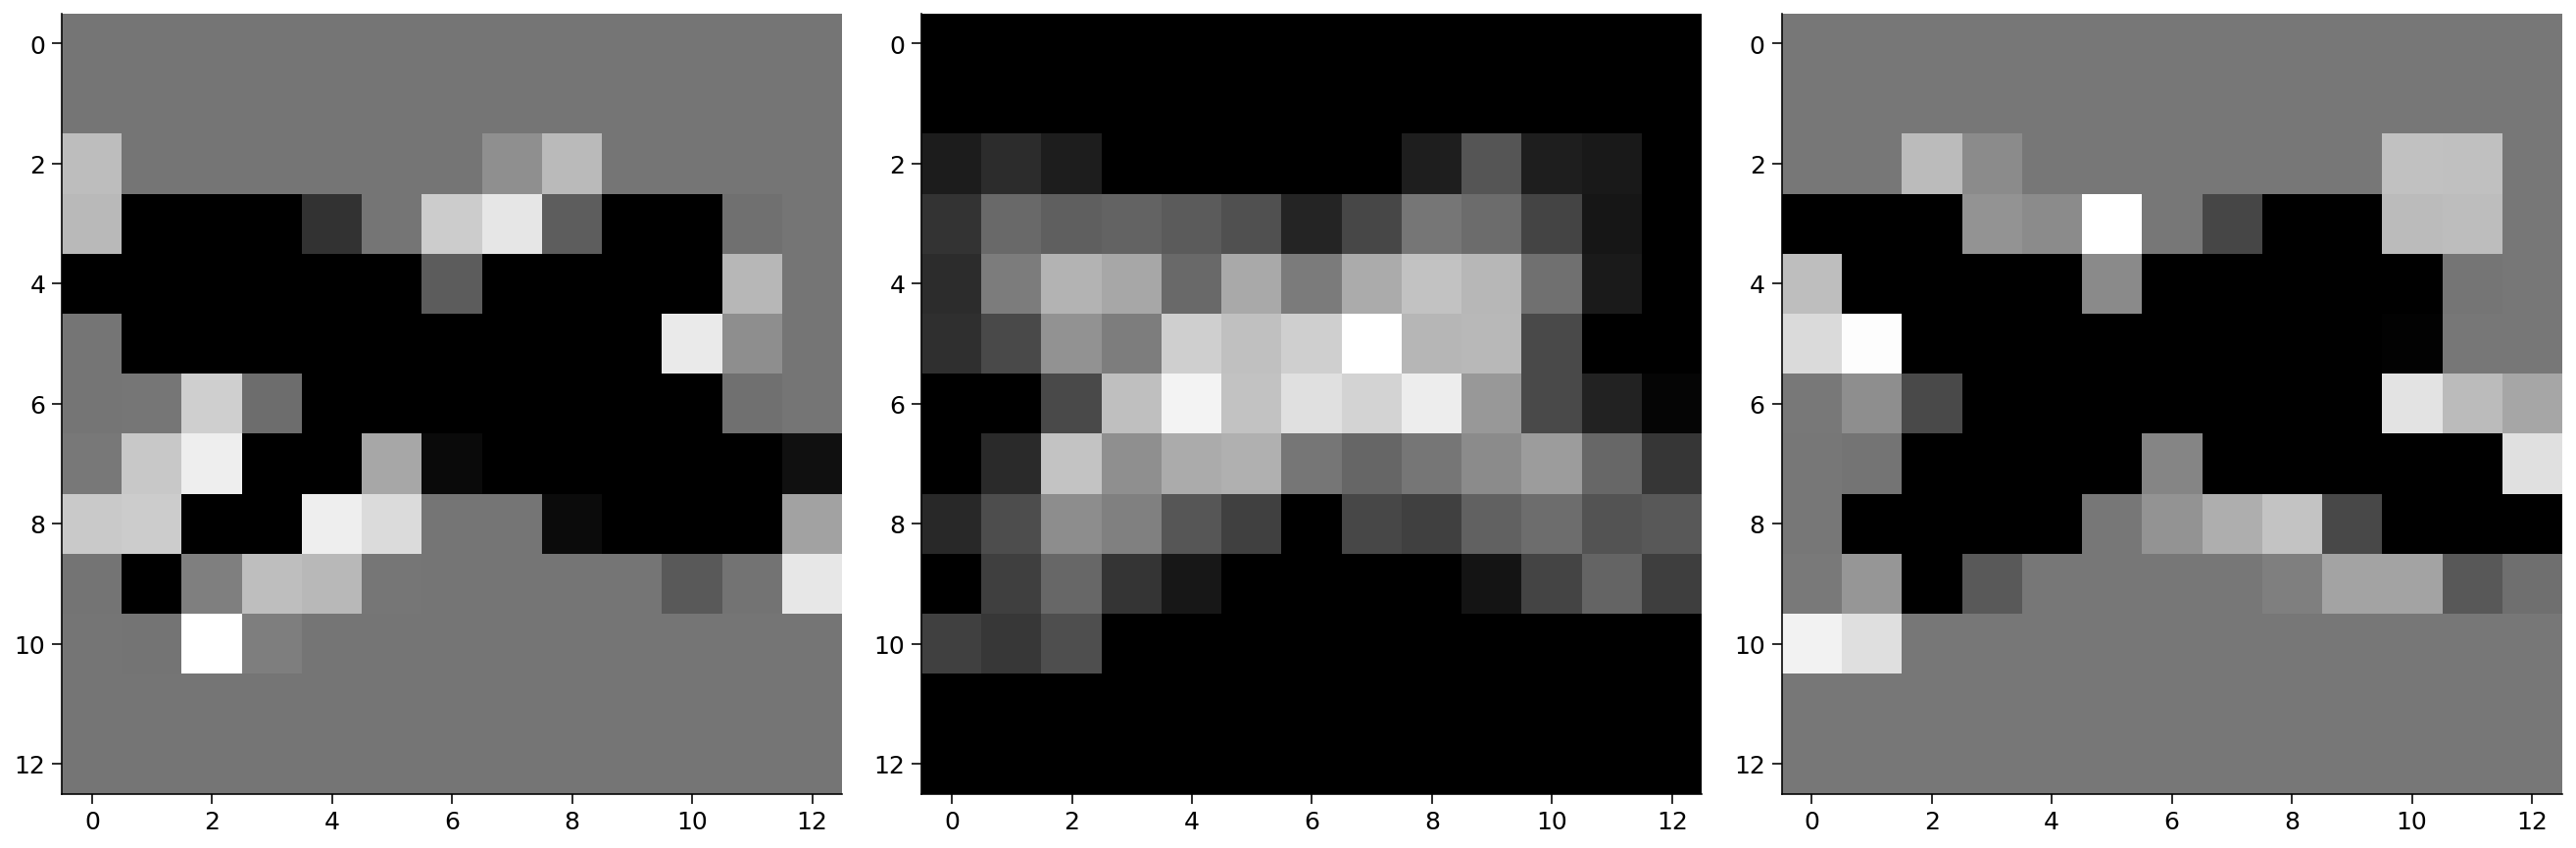

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(output_x[0], cmap=plt.get_cmap('gray'))
ax2.imshow(output_x[1], cmap=plt.get_cmap('gray'))
ax3.imshow(output_x[2], cmap=plt.get_cmap('gray'))
fig.set_size_inches(18.5, 10.5)
plt.show()

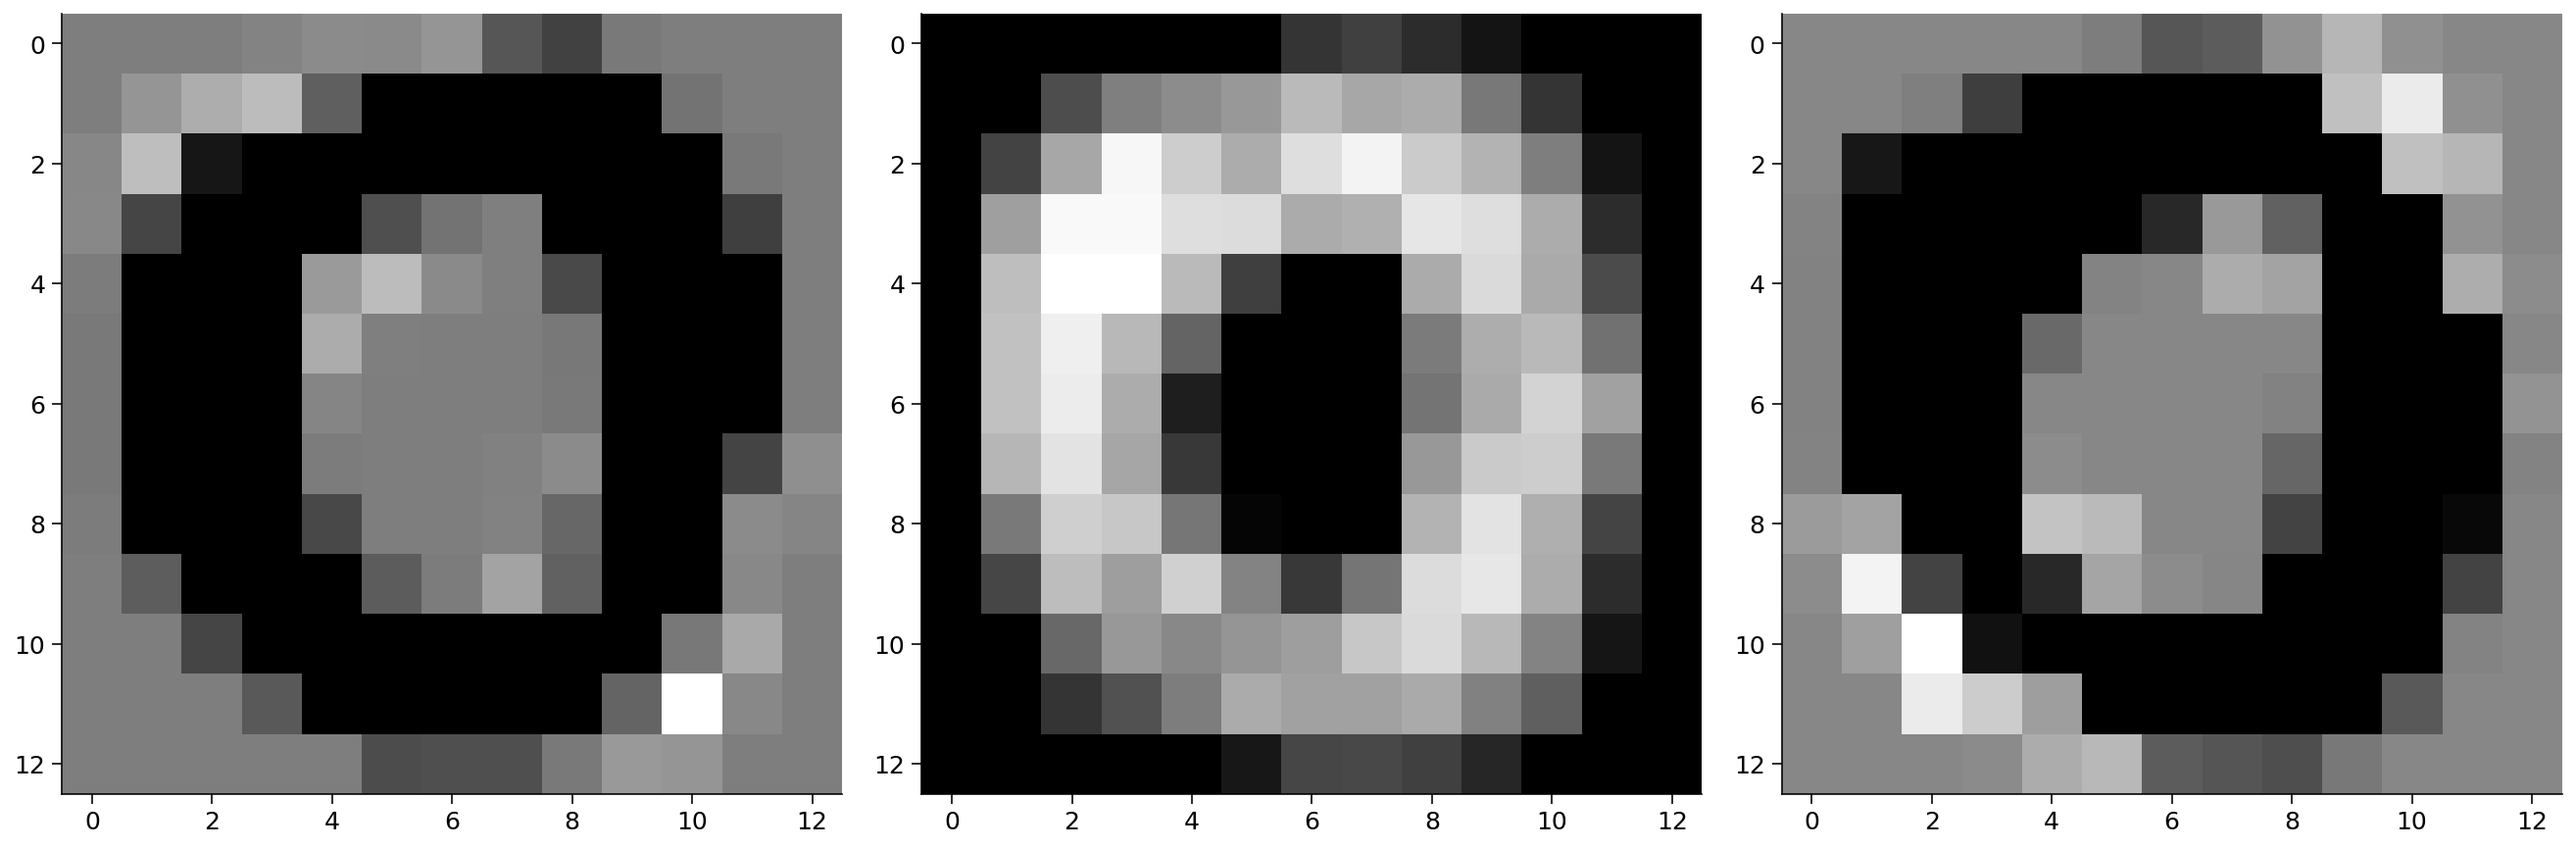

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(output_o[0], cmap=plt.get_cmap('gray'))
ax2.imshow(output_o[1], cmap=plt.get_cmap('gray'))
ax3.imshow(output_o[2], cmap=plt.get_cmap('gray'))
fig.set_size_inches(18.5, 10.5)
plt.show()

You should observe the size of the output as being half of what you saw after the ReLU section, which is due to the Maxpool layer. 

Despite the reduction in the size of the output, the important or high-level feature in the output still remains intact.

---
# Section 7: Number of Parameters in CNNs




Video available at https://youtube.com/watch?v=oJN_migdZus


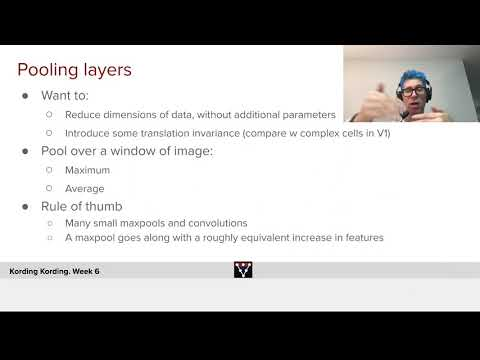

In [43]:
#@title Video: Reduction in Parameters to Learn Compared to Fully Connected Networks
import time
try: t6;
except NameError: t6=time.time()

from IPython.display import YouTubeVideo

video = YouTubeVideo(id="oJN_migdZus", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

---
# Section 8: Stacking up the Layers





Video available at https://youtube.com/watch?v=vX4u3gQN730


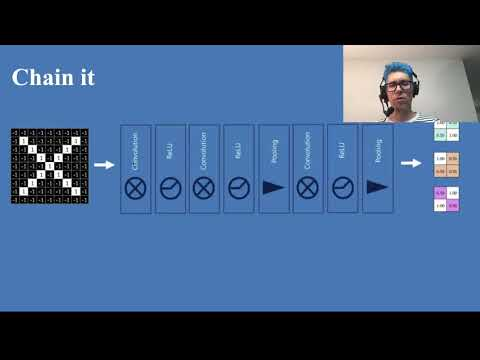

In [46]:
#@title Video: Putting it All Together
import time
try: t7;
except NameError: t7=time.time()

from IPython.display import YouTubeVideo

video = YouTubeVideo(id="vX4u3gQN730", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

In [47]:
#@title Train/Test Functions

def train(model, device, train_loader, epochs):
    model.train()

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(),
                              lr=0.01)
    for epoch in range(epochs):
        with tqdm(train_loader, unit='batch') as tepoch:
            for data, target in tepoch:
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data)
                
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
                tepoch.set_postfix(loss=loss.item())
                sleep(0.1)

def test(model, device, data_loader):
    model.eval()
    correct = 0
    total = 0
    for data in data_loader:
        inputs, labels = data
        inputs = inputs.to(device).float()
        labels = labels.to(device).long()

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    return acc

## Exercise 8: Implement your own CNN.

Let's stack up all we have learnt. Create a CNN with the following structure. <br>
- Convolution (input_channel=1, output_channels=32, kernel_size=3)
- Convolution (input_channel=32, output_channels=64, kernel_size=3)
- Pool Layer 
- Fully Connected Layer (9216, 128)
- Fully Connected layer (128, 2)

Note: As discussed in the video, we would like to flatten the output from the Convolutional Layers before passing on the Linear layers, thereby converting an input of shape [BatchSize, Channels, Height, Width] to [BatchSize, Channels\*Height\*Width], which in this case would be from [32, 64, 12, 12] (output of second convolution layer) to [32, 64\*12\*12] = [64, 9216].<br> Hint: You could use torch.flatten in order to flatten the input at this stage. 

Also, don't forget the ReLUs! No need to add to a ReLU after the final fully connected layer.



In [48]:
class EMNIST_Net(nn.Module):
  def __init__(self):
    super(EMNIST_Net, self).__init__()

    ####################################################################
    # Fill in missing code below (...),
    # then remove or comment the line below to test your function
    raise NotImplementedError("Define the required layers")
    ####################################################################
    self.conv1 = nn.Conv2d(...)
    self.conv2 = nn.Conv2d(...)
    self.fc1 = nn.Linear(...)
    self.fc2 = nn.Linear(...)
    self.pool = nn.MaxPool2d(...)

  def forward(self, x):
    ####################################################################
    # Fill in missing code below (...),
    # then remove or comment the line below to test your function
    # Hint: Do not forget to flatten the image as it goes from Convolution Layers to Linear Layers!
    raise NotImplementedError("Define forward pass for any input x")
    ####################################################################
    x = ...


### Uncomment the lines below to train your network   
# emnist_net = EMNIST_Net().to(device)
# train(emnist_net, device, train_loader, 1)

Now, let's run the network on the test data!

In [50]:
test(emnist_net, device, test_loader)

99.1875

You should have been able to get a test accuracy of around $99%$!

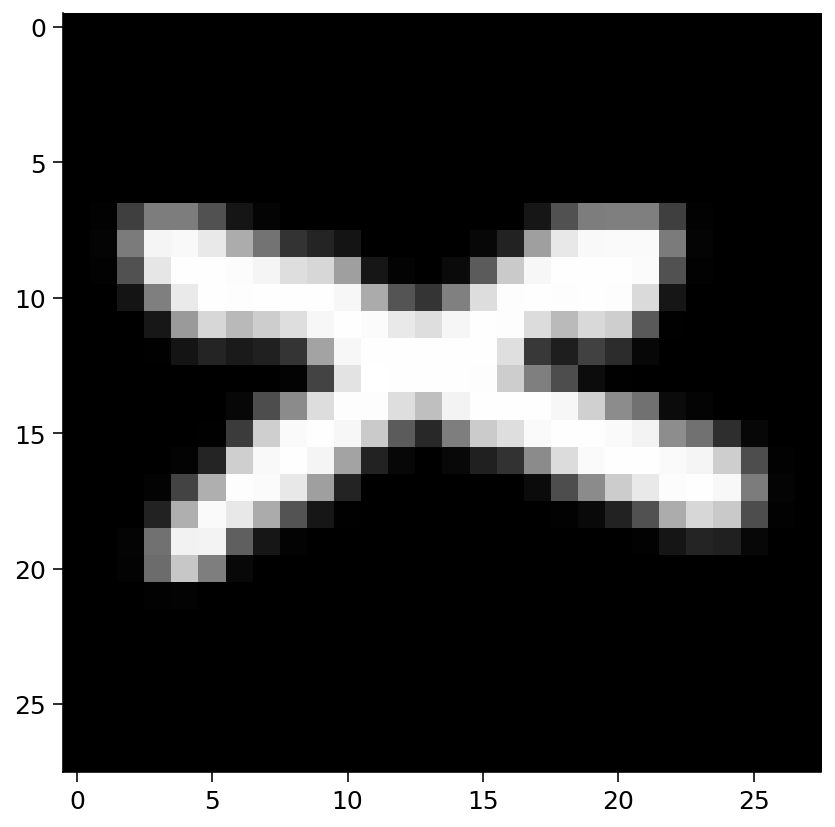

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([[0.0011, 0.9989]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [51]:
x_img = emnist_train[x_img_idx][0].unsqueeze(dim=0).to(device)
plt.imshow(emnist_train[x_img_idx][0].reshape(28, 28),
           cmap=plt.get_cmap('gray'))
plt.show()
output = emnist_net(x_img)
F.softmax(output)

The network is quite confident that this image is an $X$ ! <br>Note that this is evident from the Softmax Output, which shows the probabilities of the image belonging to each of the classes. A higher probability of belonging to class 1 i.e., class $X$. <br><br>Let us also test the network against an $O$ image. 

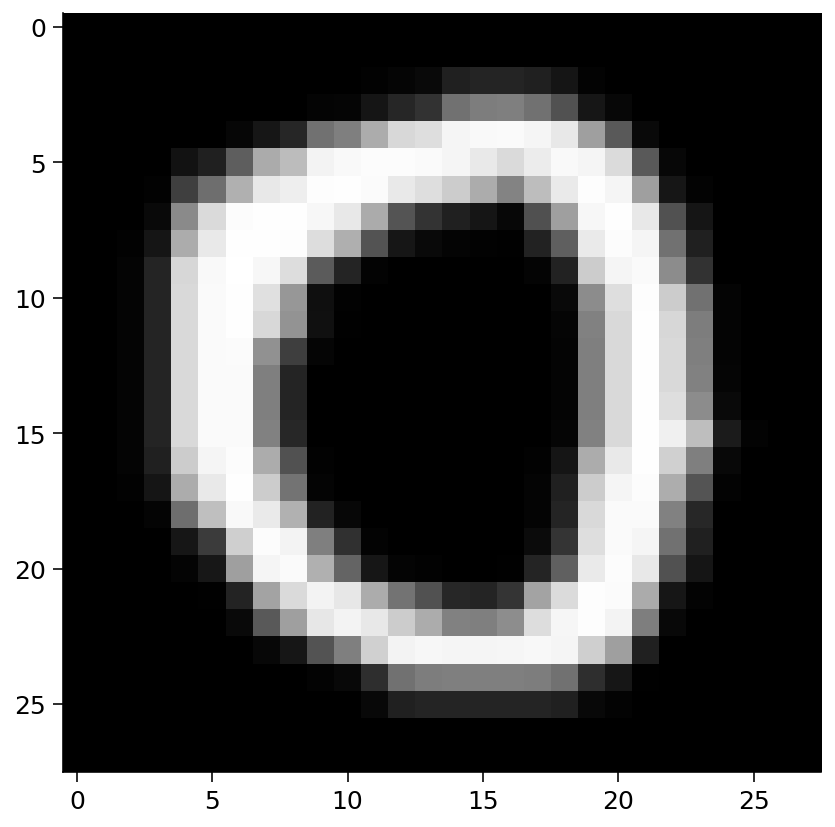

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([[9.9937e-01, 6.2550e-04]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [52]:
x_img = emnist_train[o_img_idx][0].unsqueeze(dim=0).to(device)
plt.imshow(emnist_train[o_img_idx][0].reshape(28, 28),
           cmap=plt.get_cmap('gray'))
plt.show()
output = emnist_net(o_img)
F.softmax(output)

Again, the predicted label is correct for the $O$ image. 

# Submit your responses
Please run the following cell and then press "Submit" so we can record your responses.

In [4]:
import time
import numpy as np
from IPython.display import IFrame
#@markdown #Run Cell to Show Airtable Form
#@markdown Confirm your answers and then click "Submit". If you're having issues, please use this link and manually fill in your answers: https://airtable.com/shrKipamr3e5POFFQ

def prefill_form(src, fields: dict):
  '''
  src: the original src url to embed the form
  fields: a dictionary of field:value pairs,
  e.g. {"pennkey": my_pennkey, "location": my_location}
  '''
  prefills = "&".join(["prefill_%s=%s"%(key, fields[key]) for key in fields])
  src = src + prefills
  src = "+".join(src.split(" "))
  return src


#autofill time if it is not present
try: t0;
except NameError: t0 = time.time()
try: t1;
except NameError: t1 = time.time()

#autofill fields if they are not present
#a missing pennkey and pod will result in an Airtable warning
#which is easily fixed user-side.
try: my_pennkey;
except NameError: my_pennkey = ""

try: my_pod;
except NameError: my_pod = "Select"

try: my_email;
except NameError: my_email = ""

try: imagenet_features;
except NameError: imagenet_features = ""

try: fcn_invariance;
except NameError: fcn_invariance = ""

try: edge_generate;
except NameError: edge_generate = ""

try: transpose_kernel;
except NameError: transpose_kernel = ""

try: multiple_filters;
except NameError: multiple_filters = ""

times = np.array([t1])-t0

fields = {"pennkey": my_pennkey,
          "pod": my_pod,
          "tutorial": tutorial,
          "email": my_email,
          "imagenet_features": imagenet_features,
          "fcn_invariance":fcn_invariance,
          "edge_generate": edge_generate,
          "transpose_kernel":transpose_kernel,
          "multiple_filters":multiple_filters,
          "cumulative_times": times}

src = "https://airtable.com/embed/shrKVrg3XpMiaaenp?"

#now instead of the original source url, we do: src = prefill_form(src, fields)
display(IFrame(src = prefill_form(src, fields), width = 800, height = 400))

## Feedback
How could this session have been better? How happy are you in your group? How do you feel right now?

Feel free to use the embeded form below or use this link:
<a target="_blank" rel="noopener noreferrer" href="https://airtable.com/shr1TzujOOOY21kFQ">https://airtable.com/shr1TzujOOOY21kFQ</a>

In [5]:
# @title Feedback form
display(IFrame(src="https://airtable.com/embed/shr1TzujOOOY21kFQ", width = 800, height = 400))